In [64]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# ocean_data=xr.open_dataset("/Users/loganknudsen/Documents/UMD_Research_Local_File_Saves/psi_base_test_remove_b.nc")
ocean_data=xr.open_dataset("/Users/loganknudsen/Documents/UMD_Research_Local_File_Saves/BBL_w_O_40_base_test_hr.nc") #i=103

In [ ]:
ocean_data.u

In [3]:
u = ocean_data.u+ocean_data.U
v = ocean_data.v+ocean_data.V
b = ocean_data.B
# B = ocean_data.B
w = ocean_data.w

In [ ]:
f = 2*(7.292115e-5)*np.sin(np.pi/4)
v.time[19]*(f/(2*np.pi))

In [ ]:
# ocean_data.E

In [ ]:
# vmin and vmax control colorbar range
# for i in range(len(ocean_data.time)):
# show timw -20, -25, -30, -35
q = -2
v[q].plot()
# xr.plot.contour(b[q,:,:,0],levels=20,cmap="gray")
# # plt.title("Small Pertubations w/0 Background")
# plt.show()

In [ ]:
b[0,:,0,:].dims

In [ ]:
# plt.contour(b[0])
b[0,:,0,:].mean(dim='xC').plot()#.plot.contour()

In [ ]:
import matplotlib.animation
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["animation.html"] = "jshtml"
plt.rcParams['animation.embed_limit'] = 2**128
# plt.rcParams['figure.dpi'] = 150  
plt.ioff()
fig, axs = plt.subplots()

frms = len(ocean_data.u.time)
def animate(t):
    plt.clf()
    ocean_data.u[t].plot(add_colorbar=True,vmin=-0.0001,vmax=0.0001,cmap='bwr') # vmin=-0.001,vmax=0.001
    # plt.contour(b[t,:,0,:],cmap="Greys")
    b[t,:,0,:].plot.contour(cmap="ocean",levels= 10)

matplotlib.animation.FuncAnimation(fig, animate, frames=frms)
# anim = matplotlib.animation.FuncAnimation(fig, animate, frames=frms)
# # writervideo = matplotlib.animation.FFMpegWriter(fps=60) 
# anim.save('u_base_test_PSI.gif') 
# plt.close()

In [10]:
import matplotlib.animation
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["animation.html"] = "jshtml"
plt.rcParams['animation.embed_limit'] = 2**128
# plt.rcParams['figure.dpi'] = 150  
plt.ioff()
fig, axs = plt.subplots()

frms = len(w.time)
def animate(t):
    plt.clf()
    ocean_data.w[t].plot(add_colorbar=True,vmin=-0.0001,vmax=0.0001,cmap='bwr') # vmin=-0.001,vmax=0.001
    # plt.contour(b[t,:,0,:],cmap="Greys")
    b[t,:,0,:].plot.contour(cmap="ocean",levels= 10)

# matplotlib.animation.FuncAnimation(fig, animate, frames=frms)
anim = matplotlib.animation.FuncAnimation(fig, animate, frames=frms)
# writervideo = matplotlib.animation.FFMpegWriter(fps=240) 
anim.save('w_PSI_base_40.gif',fps=240) 
plt.close()

MovieWriter ffmpeg unavailable; using Pillow instead.


In [ ]:
import matplotlib.animation
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["animation.html"] = "jshtml"
plt.rcParams['animation.embed_limit'] = 2**128
# plt.rcParams['figure.dpi'] = 150  
plt.ioff()
fig, axs = plt.subplots()

frms = len(v.time)
def animate(t):
    plt.clf()
    ocean_data.PV[t].plot(add_colorbar=True,vmin=-1e-9,vmax=1e-9,cmap='Accent') # vmin=-0.001,vmax=0.001
    # plt.contour(b[t,:,0,:],cmap="Greys")
    b[t,:,0,:].plot.contour(cmap="ocean",levels= 10)

# matplotlib.animation.FuncAnimation(fig, animate, frames=frms)
anim = matplotlib.animation.FuncAnimation(fig, animate, frames=frms)
# writervideo = matplotlib.animation.FFMpegWriter(fps=60) 
anim.save('PV_barotropic.gif') 
plt.close()

In [ ]:
import matplotlib.animation
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["animation.html"] = "jshtml"
plt.rcParams['animation.embed_limit'] = 2**128
# plt.rcParams['figure.dpi'] = 150  
plt.ioff()
fig, axs = plt.subplots()

frms = len(v.time)
def animate(t):
    plt.clf()
    ocean_data.KE[t].plot(add_colorbar=True,vmin=0,vmax=1e-7,cmap='bwr') # vmin=-0.001,vmax=0.001
    # plt.contour(b[t,:,0,:],cmap="Greys")
    b[t,:,0,:].plot.contour(cmap="ocean",levels= 10)

matplotlib.animation.FuncAnimation(fig, animate, frames=frms)
# anim = matplotlib.animation.FuncAnimation(fig, animate, frames=frms)
# # writervideo = matplotlib.animation.FFMpegWriter(fps=60) 
# anim.save('u_base_test_case_downwelling_color_change.gif') 
# plt.close()

In [47]:
KE_spatial_average_time_series = ocean_data.KE.mean(dim=['xC','yC','zC'])
KE_spatial_average_time_series

<xarray.DataArray 'KE' (time: 2068)>
array([9.88893394e-09, 7.57536428e-09, 5.96627992e-09, ...,
       3.14490704e-05, 3.13219954e-05, 3.11902408e-05])
Coordinates:
  * time     (time) timedelta64[ns] 00:00:00 ... 14 days 12:53:28.762035316

In [70]:
inertial_period = KE_spatial_average_time_series.time/pd.Timedelta("1s")*(1e-4)/(2*np.pi)
KE_spatial_average_time_series_ip = KE_spatial_average_time_series.assign_coords(intp = ('time',inertial_period.data))

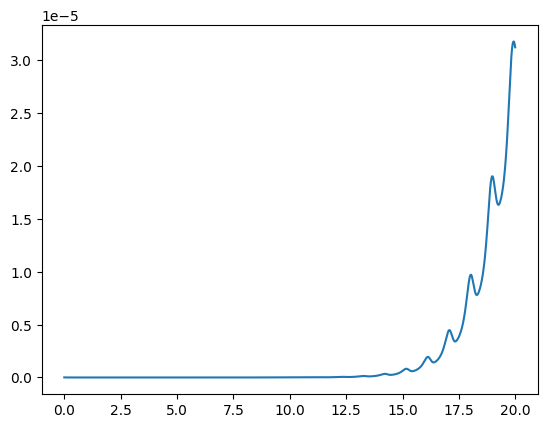

In [71]:
plt.plot(KE_spatial_average_time_series_ip.intp,KE_spatial_average_time_series_ip.values)

In [58]:
timeKE = KE_spatial_average_time_series.time
timeKE*1e-9

<xarray.DataArray 'time' (time: 2068)>
array([      0,     628,    1256, ..., 1254752, 1255380, 1256008],
      dtype='timedelta64[ns]')
Coordinates:
  * time     (time) timedelta64[ns] 00:00:00 ... 14 days 12:53:28.762035316

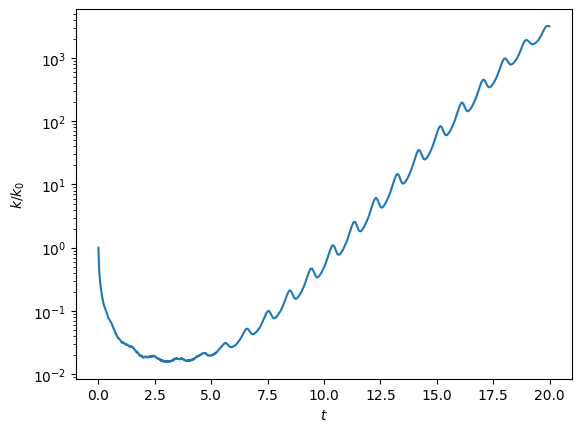

In [74]:
plt.plot(KE_spatial_average_time_series_ip.intp,KE_spatial_average_time_series_ip.values/KE_spatial_average_time_series_ip.values[0])
plt.ylabel('$k$/$k_0$')
plt.xlabel('$t$')
plt.yscale('log')
plt.show()

In [ ]:
ocean_data.time[10:-1:2]*10**(-4)/(2*np.pi)

In [ ]:
plt.plot(ocean_data.time[490:]*(1e-4)/(2*np.pi),ocean_data.u[490:,20,0,250]/ocean_data.v[490,20,0,250])
plt.plot(ocean_data.time[490:]*(1e-4)/(2*np.pi),10*ocean_data.U[490:,20,0,250]/ocean_data.V[490,20,0,250])
plt.ylabel("$u/v_1$,$10*U/V_1$")
plt.show()

In [ ]:
plt.plot(ocean_data.time[9:]*(1e-4)/(2*np.pi),ocean_data.v[9:,20,0,250]/ocean_data.v[9,20,0,250])
plt.plot(ocean_data.time[9:]*(1e-4)/(2*np.pi),ocean_data.V[9:,20,0,250]/ocean_data.V[9,20,0,250])
plt.ylabel("$u/v_1$,$U/V_1$")
plt.show()

In [ ]:
plt.plot(ocean_data.time[10:]*(1e-4)/(2*np.pi),ocean_data.U[10:,20,0,250]/ocean_data.V[10,20,0,250])
plt.ylabel("$U/U_1$")
plt.show()

In [ ]:
plt.plot(ocean_data.time[10:]*(1e-4)/(2*np.pi),ocean_data.V[10:,20,0,250]/ocean_data.V[10,20,0,250])
plt.ylabel("$V/V_1$")
plt.show()

In [ ]:
plt.plot(ocean_data.U[10:,20,0,250],ocean_data.V[10:,20,0,250])
plt.gca().set_aspect("equal")
plt.show()

In [ ]:
time = ocean_data.time[10:]*1e-9
plt.plot(time*(1e-4)/(2*np.pi),ocean_data.v[10:,20,0,250]/ocean_data.v[10,20,0,250])
plt.ylabel("$v/v_1$")
plt.show()

In [ ]:
plt.plot(ocean_data.u[10:,20,0,250],ocean_data.v[10:,20,0,250])
plt.xlabel("u")
plt.ylabel("v")
plt.show()

In [ ]:
KE_spatial_average_time_series.differentiate("time",datetime_unit='timedelta64[ns]')

In [ ]:
eps_spatial_average_time_series = ocean_data.ε.mean(dim=['xC','yC','zC'])

In [ ]:
plt.plot(eps_spatial_average_time_series.time[50:100]*(1e-4)/(2*np.pi),eps_spatial_average_time_series.values[50:100])
plt.show()

In [ ]:
PV_spatial_average_time_series = ocean_data.PV.mean(dim=['xF','yF'])
PV_spatial_average_time_series

In [ ]:
v.zC

In [ ]:
plt.plot(u.isel(xF=500,yC=0,zC=25),v.isel(xC=500,yF=0,zC=25))
plt.gca().set_aspect('equal')

In [19]:
Vi = 0.1
N2 = 1E-5
theta = 1E-2
f = 1E-4
s2 = N2*theta**2/f**2
gamma = (1+s2)**(-1) 
h = (f*Vi)/(gamma*N2*theta)
dVdz = gamma*N2*theta/f
u_z_average = u.mean(dim=['zC'])
v_z_average = (v).mean(dim=['zC'])
w_z_average = w.mean(dim=['zF'])
# .isel(zC=np.arange(0,55))
u_diff = (u-u_z_average).mean(dim=['xF','yC','zC'])
v_diff = (v-v_z_average-dVdz*(h-v.zC)*np.heaviside(-v.zC+h,1)).mean(dim=['xC','yF','zC'])
w_diff = (w-w_z_average).mean(dim=['xC','yC','zF'])

In [46]:
K = 1/2 *(u_diff**2+v_diff**2+w_diff**2)
K.time.dt.seconds

<xarray.DataArray 'seconds' (time: 2068)>
array([    0,   628,  1256, ..., 45152, 45780, 46408])
Coordinates:
  * time     (time) timedelta64[ns] 00:00:00 ... 14 days 12:53:28.762035316
Attributes:
    long_name:  Time

In [42]:
time = np.array(K.time.dt.second())*(1e-13)/(2*np.pi)
time

AttributeError: 'TimedeltaAccessor' object has no attribute 'second'

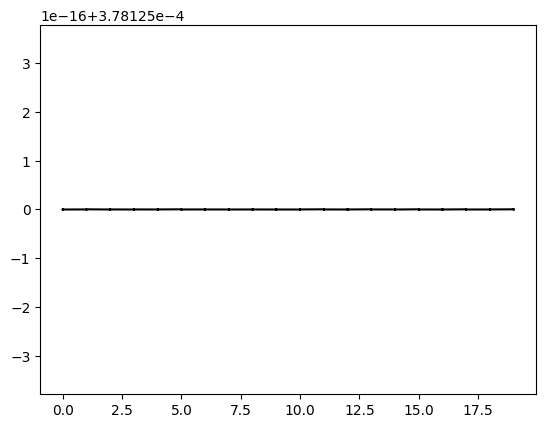

In [37]:

plt.plot(np.array(K.time)*(1e-13)/(2*np.pi),K,color="k")
# plt.plot(KE_spatial_average_time_series.time*(1e-4)/(2*np.pi),KE_spatial_average_time_series.values/K.values[0])
plt.show()

In [ ]:
import matplotlib.animation
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["animation.html"] = "jshtml"
# plt.rcParams['figure.dpi'] = 150  
plt.ioff()
fig, axs = plt.subplots()

frms = len(v.time)
def animate(t):
    plt.clf()
    PV_spatial_average_time_series[t].plot()
    plt.ylim([0,1e-9])
    # plt.contour(b[t,:,0,:],cmap="Greys")
    # b[t,:,0,:].plot.contour(cmap="Greys",levels= 10)

# anim = matplotlib.animation.FuncAnimation(fig, animate, frames=frms)
# # writervideo = matplotlib.animation.FFMpegWriter(fps=60) 
# anim.save('spatially_averaged_PV_standard_case_zoomed_in.gif') 
# plt.close()
matplotlib.animation.FuncAnimation(fig, animate, frames=frms)

In [ ]:
import matplotlib.animation
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["animation.html"] = "jshtml"
# plt.rcParams['figure.dpi'] = 150  
plt.ioff()
fig, axs = plt.subplots()

frms = len(v.time)
def animate(t):
    plt.clf()
    u[t].plot(add_colorbar=True,vmin=-0.001,vmax=0.001)
    # plt.contour(b[t,:,0,:],cmap="Greys")
    b[t,:,0,:].plot.contour(cmap="Greys",levels= 10)

# matplotlib.animation.FuncAnimation(fig, animate, frames=frms)
anim = matplotlib.animation.FuncAnimation(fig, animate, frames=frms)
# writervideo = matplotlib.animation.FFMpegWriter(fps=60) 
anim.save('base_test_case_downwelling_color_change.gif') 
plt.close()

In [ ]:
import matplotlib.animation
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["animation.html"] = "jshtml"
# plt.rcParams['figure.dpi'] = 150  
plt.ioff()
fig, axs = plt.subplots()

frms = len(v.time)
def animate(t):
    plt.clf()
    u[t].mean('xF').plot()
    plt.ylim([-0.01,0.01])
    # plt.contour(b[t,:,0,:],cmap="Greys")
    # b[t,:,0,:].plot.contour(cmap="Greys",levels= 10)

# anim = matplotlib.animation.FuncAnimation(fig, animate, frames=frms)
# # writervideo = matplotlib.animation.FFMpegWriter(fps=60) 
# anim.save('jump_p_u.gif') 
# plt.close()
matplotlib.animation.FuncAnimation(fig, animate, frames=frms)

In [ ]:
import matplotlib.animation
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["animation.html"] = "jshtml"
# plt.rcParams['figure.dpi'] = 150  
plt.ioff()
fig, axs = plt.subplots()

frms = len(v.time)
def animate(t):
    plt.clf()
    v[t].mean('xC').plot()
    plt.ylim([-0.01,0.01])
    # plt.contour(b[t,:,0,:],cmap="Greys")
    # b[t,:,0,:].plot.contour(cmap="Greys",levels= 10)

# anim = matplotlib.animation.FuncAnimation(fig, animate, frames=frms)
# # writervideo = matplotlib.animation.FFMpegWriter(fps=60) 
# anim.save('jump_p_v.gif') 
# plt.close()
matplotlib.animation.FuncAnimation(fig, animate, frames=frms)

In [ ]:
import matplotlib.animation
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["animation.html"] = "jshtml"
# plt.rcParams['figure.dpi'] = 150  
plt.ioff()
fig, axs = plt.subplots()

frms = len(v.time)
def animate(t):
    plt.clf()
    b[t].mean('xC').plot()
    plt.ylim([-0.0001,0.0001])
    # plt.contour(b[t,:,0,:],cmap="Greys")
    # b[t,:,0,:].plot.contour(cmap="Greys",levels= 10)

# anim = matplotlib.animation.FuncAnimation(fig, animate, frames=frms)
# # writervideo = matplotlib.animation.FFMpegWriter(fps=60) 
# anim.save('jump_p_b.gif') 
# plt.close()
matplotlib.animation.FuncAnimation(fig, animate, frames=frms)

In [ ]:
import matplotlib.animation
import matplotlib.pyplot as plt
import numpy as np
# plt.rcParams["animation.html"] = "jshtml"
# plt.rcParams['figure.dpi'] = 150  
plt.ioff()
fig, ax = plt.subplots()

frms = len(v.time)
def animate(t):
    plt.clf()
    v[t].plot(add_colorbar=True,vmin=-0.0001,vmax=0.0001)
    # plt.contour(b[t,:,0,:],cmap="Greys")
    b[t,:,0,:].plot.contour(cmap="Greys",levels= 20)

anim = matplotlib.animation.FuncAnimation(fig, animate, frames=frms)
# writervideo = matplotlib.animation.FFMpegWriter(fps=60) 
anim.save('base_test_case_downwelling.gif') 
plt.close()

In [ ]:
import matplotlib.animation
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["animation.html"] = "jshtml"
# plt.rcParams['figure.dpi'] = 150  
plt.ioff()
fig, ax = plt.subplots()

frms = len(v.time)
def animate(t):
    plt.clf()
    cf = v[t].plot(add_colorbar=True)

matplotlib.animation.FuncAnimation(fig, animate, frames=frms)

b[1].plot()